<a href="https://colab.research.google.com/github/hariharanrl/DeepLearning/blob/master/Project_AugData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip3 install tensorflow==1.12.0 
%tensorflow_version 1.x

TensorFlow 1.x selected.


##Mount the Drive

In [2]:
import os
os.chdir('/content/drive/My Drive/NITK/Deep Learning Course 2020/classification data/Aug_PCB')
os.getcwd()

'/content/drive/My Drive/NITK/Deep Learning Course 2020/classification data/Aug_PCB'

##Loading Training and Testing Data

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
x= np.load("s_x_train.npy")
y= np.load("s_y_train.npy")
print(x.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5040, 300, 300, 3)
(5040,)
(4032, 300, 300, 3) (4032,)
(1008, 300, 300, 3) (1008,)


##Data Normalization

In [4]:
import keras
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train=keras.utils.normalize(X_train, axis=-1, order=2)
X_test=keras.utils.normalize(X_test, axis=-1, order=2)
print(np.max(X_train),np.max(X_test))
print(np.min(X_train),np.min(X_test))


Using TensorFlow backend.


1.0 1.0
0.0 0.0


##Categorizing the Label

In [5]:
#X_train = X_train.reshape(X_train.shape[1]*X_train.shape[2],300,300,3)
#X_test =  X_test.reshape(X_test.shape[0],300,300,1)
#print(X_train.shape)
#print(y_test.shape)
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]
print(y_train.shape)
print(y_test.shape)
print(num_classes)



(4032, 2)
(1008, 2)
2


##Building Alexnet Model

In [0]:
def proj_model():
  #import tensorflow as tf
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import Dropout
  from keras.layers import Flatten
  from keras.constraints import maxnorm
  from keras.optimizers import SGD
  from keras.layers.convolutional import Conv2D
  from keras.layers import BatchNormalization
  from keras.layers.convolutional import MaxPooling2D
  from keras.utils import np_utils

  model=Sequential()
          
  model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
  model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Dropout(0.5))
  model.add(Flatten())
    
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(512, activation='relu'))
    
  model.add(Dense(num_classes, activation='softmax'))
    
  lrate = 0.01
  epochs=25
  decay = lrate/epochs
  sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
  return model


##Model Summary

In [7]:
model=proj_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
______________________________________

##Callbacks

In [0]:
import os
os.chdir("/content/drive/My Drive/NITK")
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
mc = ModelCheckpoint('ProjectAug.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/drive/My Drive/NITK/logs2', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('ProjectAug.csv',append=True)

##Model Fitting

In [9]:
histoy=model.fit(X_train, y_train, validation_split=(0.2), epochs=25, batch_size=32,verbose=2,callbacks=[cv,mc,tb])
#histoy=model.fit(X_train,y_train,validation_split=(0.2),epochs=30,batch_size=32,verbose=2)


Train on 3225 samples, validate on 807 samples


Epoch 1/25
 - 12s - loss: 0.6803 - accuracy: 0.5398 - val_loss: 0.6760 - val_accuracy: 0.5799

Epoch 2/25
 - 6s - loss: 0.6234 - accuracy: 0.6195 - val_loss: 0.5902 - val_accuracy: 0.6481
Epoch 3/25
 - 6s - loss: 0.5972 - accuracy: 0.6412 - val_loss: 0.5869 - val_accuracy: 0.6989
Epoch 4/25
 - 6s - loss: 0.5223 - accuracy: 0.7340 - val_loss: 0.4380 - val_accuracy: 0.8178
Epoch 5/25
 - 6s - loss: 0.4075 - accuracy: 0.8307 - val_loss: 0.5328 - val_accuracy: 0.8377
Epoch 6/25
 - 6s - loss: 0.3122 - accuracy: 0.8729 - val_loss: 0.2792 - val_accuracy: 0.8810
Epoch 7/25
 - 6s - loss: 0.2505 - accuracy: 0.8943 - val_loss: 0.3376 - val_accuracy: 0.8786
Epoch 8/25
 - 6s - loss: 0.2275 - accuracy: 0.8980 - val_loss: 0.2770 - val_accuracy: 0.8959
Epoch 9/25
 - 6s - loss: 0.1900 - accuracy: 0.9178 - val_loss: 0.1990 - val_accuracy: 0.9157
Epoch 10/25
 - 6s - loss: 0.1497 - accuracy: 0.9395 - val_loss: 0.1889 - val_accuracy: 0.9343
Epoch 11/25
 - 6s

##Overall Accuracy 

In [10]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)
print(test_loss)

1008/1008 [==============================] - 1s 978us/step
0.9791666865348816
0.11454975715513149


In [11]:
histoy.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 25,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 3225,
 'steps': None,
 'verbose': 2}

In [0]:
train_loss = histoy.history['loss']
train_acc = histoy.history['accuracy']
val_loss = histoy.history['val_loss']
val_acc = histoy.history['val_accuracy']
xc=range(25)

##Loss Curves

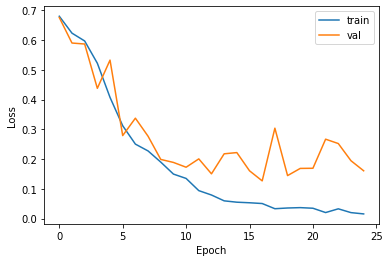

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

##Loading the model with less validation loss

In [14]:
model.load_weights('ProjectAug.h5')
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)
print(test_loss)

1008/1008 [==============================] - 1s 926us/step
0.971230149269104
0.12142999655020142


##Test

In [15]:
i=11
print("Original is ",y_test[i])
pred=model.predict(X_test[i].reshape(1,300,300,3))
print("Predicted is ",pred)

Original is  [0. 1.]
Predicted is  [[1.9582629e-08 1.0000000e+00]]


##Classification Report and Confusion Matrix

In [16]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target = ['Defective','Non-Defective']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target))
#print(confusion_matrix(y_test,y_pred))

               precision    recall  f1-score   support

    Defective       0.95      0.99      0.97       506
Non-Defective       0.99      0.95      0.97       502

     accuracy                           0.97      1008
    macro avg       0.97      0.97      0.97      1008
 weighted avg       0.97      0.97      0.97      1008



In [17]:
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

[[501   5]
 [ 24 478]]
